# Minard's Chart

In this example, we reproduce Minard’s depiction of Napoleon’s march on Russia. The visualization can be broken down in two subplots. The first contains a Trail plot with the number of troops marching, and the second is the temperature variation.

First, we create the marching plot, and then draw the text labels over the plot.

  Activating project at `~/Documents/GitHub/CTViz_Workshop/Notebooks`


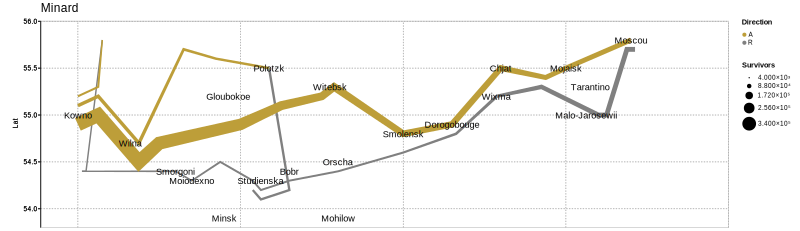

In [2]:
using Pkg
Pkg.activate("../.")
using Vizagrams

# Importing the dataset
using RDatasets
troops = RDatasets.dataset("HistData", "Minard.troops")
temp = RDatasets.dataset("HistData", "Minard.temp")
cities = RDatasets.dataset("HistData", "Minard.cities");


# Create the Plot
plt = Plot(
    title="Minard",
    config=(
        xaxis=NilD(),
        yaxis=(titleangle=π/2,),
    ),
    figsize=(1000,300),
    data=troops,
    encodings=(
        x = (field = :Long,),
        y = (field = :Lat,scale_domain=(53.8,56)),
        color = (field = :Direction, datatype=:n, scale_range=["#bd9e39",:gray]),
        detail = (field = :Group, datatype=:n),
        size = (field=:Survivors, scale_range=(1,10)),
    ),
    graphic = ∑(i=:detail,∑(i=:color) do row
        S(:fill=>row.color[1])Trail(pts=row.x ⊗ row.y,ws=row.size)
    end)
)


cities_graphic = ∑() do row
    T(plt(row,:Long,:x),plt(row,:Lat,:y))*TextMark(text=row.City)
end(cities);

draw(plt + cities_graphic, height=nothing, width=800)


#### Next, we produce the temperature plot.

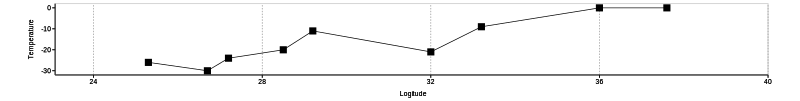

In [3]:
plt_temp = Plot(
    figsize=(1000,100),
    config = (
        ygrid=NilD(),
        xaxis=(title="Logitude",),
        yaxis=(title="Temperature",titleangle=π/2),
        ),
    data=temp,
    encodings=(
        x = (field = :Long,scale = getscale(plt,:x)),
        y = (field = :Temp,),
    ),
    graphic = S(:stroke=>:black)Line() + S(:fill=>:black, :opacity=>1)Square(l=10)
)

draw(plt_temp, height=nothing, width=800)


#### Finally, combine for the full visualization

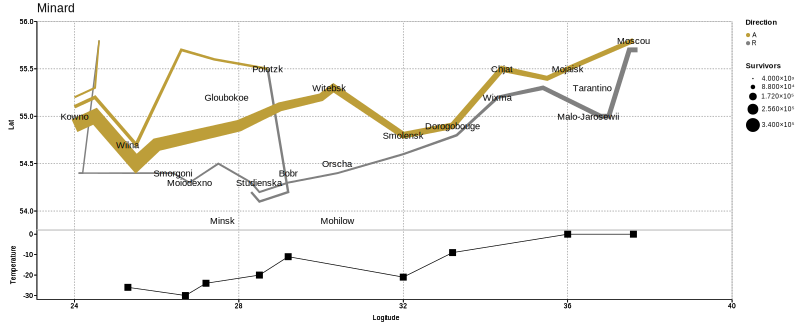

In [4]:
draw((plt + cities_graphic) ↓ plt_temp, height=nothing, width=800)